In [5]:
from os import path, walk
import csv
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import math

In [6]:
# Find the most recent output file
file_path = ''
recent_file = '5-16-11-14.csv'
file_path = path.join('../out/occupation', recent_file)

# (
# Replacement Policy
# Access Pattern
# Associativity
# Touches
# )
rows: list[tuple[str, str, int, int]] = []
data: dict[str, list[tuple[str, int, int]]] = {}

with open(file_path, newline='') as csv_file:
    reader = csv.reader(csv_file, quotechar='|')
    first_iter = True
    for row in reader:
        if first_iter:
            first_iter = False
            continue
        data_row = (row[1].strip(), int(row[2].strip()), int(row[3].strip()))
        if row[0] not in data:
            data[row[0]] = []
        b = data[row[0]]
        data[row[0]].append(data_row)
        rows.append((row[0], *data_row))
print(data)
print(rows)

{'SIEVE': [('sequential', 16, 100001), ('sequential', 16, 100001), ('sequential', 16, 100001), ('sequential', 16, 100001), ('sequential', 16, 100001), ('sequential', 16, 100001), ('sequential', 16, 100001), ('sequential', 16, 100001), ('sequential', 16, 100001), ('sequential', 16, 100001), ('sequential', 16, 100001), ('sequential', 16, 100001), ('sequential', 16, 100001), ('sequential', 16, 100001), ('sequential', 16, 100001), ('sequential', 16, 100001), ('sequential', 16, 100001), ('sequential', 16, 100001), ('sequential', 16, 100001), ('sequential', 16, 100001), ('sequential', 16, 100001), ('sequential', 16, 100001), ('sequential', 16, 100001), ('sequential', 16, 100001), ('sequential', 16, 100001), ('sequential', 16, 100001), ('sequential', 16, 100001), ('sequential', 16, 100001), ('sequential', 16, 100001), ('sequential', 16, 100001), ('sequential', 16, 100001), ('sequential', 16, 100001), ('sequential', 16, 100001), ('sequential', 16, 100001), ('sequential', 16, 100001), ('sequent

In [7]:
repls: set[str] = set()
patterns: set[str] = set()
assocs: set[int] = set()
for row in rows:
    repls.add(row[0])
    patterns.add(row[1])
    assocs.add(row[2])
print(repls)
print(patterns)
print(assocs)

{'TreePLRU', '2Tree-lre', '2Tree-rln', '2Tree-rrh', 'RR', '2Tree-rrn', '2Tree-flq', '2Tree-rfn', '2Tree-ffq', '2Tree-llh', '2Tree-ffe', '3Tree-f', '2Tree-flh', '2Tree-ffh', '2Tree-rfe', '2Tree-rlh', '2Tree-lfn', '2Tree-rlq', '2Tree-lrh', '2Tree-rle', '2Tree-rfq', '2Tree-lln', '2Tree-ffn', '2Tree-llq', '2Tree-frn', '2Tree-lrq', '3Tree-r', '2Tree-lle', '2Tree-fle', '2Tree-fln', '2Tree-rfh', '2Tree-lrn', '2Tree-lfq', '2Tree-frq', '2Tree-rrq', '3Tree-l', 'SIEVE', '2Tree-rre', '2Tree-lfh', '2Tree-lfe', '2Tree-fre', '2Tree-frh'}
{'sequential', 'repeat-3', 'repeat-4', 'repeat-5', 'double'}
{16, 8, 4}


In [8]:
assoc_to_ind = {16: 0, 8: 1, 4: 2}

class Statistic:
    def __init__(self, mean, median, max, min, stdev):
        self.mean = mean
        self.median = median
        self.max = max
        self.min = min
        self.stdev = stdev

stats: list[dict[tuple[str, str], Statistic]] = [dict(), dict(), dict()]

for repl in repls:
    for assoc in assocs:
        for pattern in patterns:
            difficulty_vals = []
            for row in rows:
                if row[0] != repl or row[1] != pattern or row[2] != assoc:
                    continue
                if row[3] > 100000:
                    continue
                difficulty_vals.append(row[3])
            diff = np.array(difficulty_vals)
            stat: Statistic
            if len(diff) == 0:
                stat = Statistic(-1, -1, -1, -1, -1)
            else:
                stat = Statistic(np.mean(diff), np.median(diff), np.max(diff), np.min(diff), np.std(diff))

            stats[assoc_to_ind[assoc]][(repl, pattern)] = stat
print(stats[0])


{('TreePLRU', 'sequential'): <__main__.Statistic object at 0x105933910>, ('TreePLRU', 'repeat-3'): <__main__.Statistic object at 0x10ba50d10>, ('TreePLRU', 'repeat-4'): <__main__.Statistic object at 0x10c109a10>, ('TreePLRU', 'repeat-5'): <__main__.Statistic object at 0x105f435d0>, ('TreePLRU', 'double'): <__main__.Statistic object at 0x10afd01d0>, ('2Tree-lre', 'sequential'): <__main__.Statistic object at 0x105773f10>, ('2Tree-lre', 'repeat-3'): <__main__.Statistic object at 0x105773fd0>, ('2Tree-lre', 'repeat-4'): <__main__.Statistic object at 0x105771d50>, ('2Tree-lre', 'repeat-5'): <__main__.Statistic object at 0x10c50a190>, ('2Tree-lre', 'double'): <__main__.Statistic object at 0x10c50a490>, ('2Tree-rln', 'sequential'): <__main__.Statistic object at 0x10c7ccd10>, ('2Tree-rln', 'repeat-3'): <__main__.Statistic object at 0x10c50a890>, ('2Tree-rln', 'repeat-4'): <__main__.Statistic object at 0x10c50a910>, ('2Tree-rln', 'repeat-5'): <__main__.Statistic object at 0x10c50a990>, ('2Tree-

In [9]:
# Get the minimum pattern for each replacement policy
repl_mins: list[dict[str, Statistic]] = [dict(), dict(), dict()]
for assoc in assocs:
    for repl in repls:
        min_stat: Statistic = Statistic(1000000, 0, 0, 0, 0)
        for (stat_repl, stat_pat), stat in stats[assoc_to_ind[assoc]].items():
            if stat_repl != repl:
                continue
            if min_stat.mean >= stat.mean and stat.mean != -1:
                min_stat = stat
        repl_mins[assoc_to_ind[assoc]][repl] = min_stat
print(repl_mins)

[{'TreePLRU': <__main__.Statistic object at 0x105933910>, '2Tree-lre': <__main__.Statistic object at 0x10c50a490>, '2Tree-rln': <__main__.Statistic object at 0x10c50aa10>, '2Tree-rrh': <__main__.Statistic object at 0x10c50af90>, 'RR': <__main__.Statistic object at 0x10c50b710>, '2Tree-rrn': <__main__.Statistic object at 0x10c5180d0>, '2Tree-flq': <__main__.Statistic object at 0x10c518850>, '2Tree-rfn': <__main__.Statistic object at 0x10c518fd0>, '2Tree-ffq': <__main__.Statistic object at 0x10c519750>, '2Tree-llh': <__main__.Statistic object at 0x10c519ed0>, '2Tree-ffe': <__main__.Statistic object at 0x10c51a7d0>, '3Tree-f': <__main__.Statistic object at 0x10c53a450>, '2Tree-flh': <__main__.Statistic object at 0x10c51b710>, '2Tree-ffh': <__main__.Statistic object at 0x10c51be90>, '2Tree-rfe': <__main__.Statistic object at 0x10c520650>, '2Tree-rlh': <__main__.Statistic object at 0x10c520dd0>, '2Tree-lfn': <__main__.Statistic object at 0x10c521550>, '2Tree-rlq': <__main__.Statistic object

In [41]:
# for assoc in assocs:
assoc_repls = []
assoc_mins = [[], [], []]
for repl in sorted(repl_mins[0].keys()):

    # for repl, stat in repl_mins[assoc_to_ind[16]].items():
    # print(repl, stat.mean)
    assoc_repls.append(repl)
    assoc_mean4 = repl_mins[assoc_to_ind[4]][repl].mean
    assoc_mean8 = repl_mins[assoc_to_ind[8]][repl].mean
    assoc_mean16 = repl_mins[assoc_to_ind[16]][repl].mean
    if assoc_mean4 > 100000:
        assoc_mean4 = 0
    if assoc_mean8 > 100000:
        assoc_mean8 = 0
    if assoc_mean16 > 100000:
        assoc_mean16 = 0
    assoc_mins[0].append(assoc_mean4)
    assoc_mins[1].append(assoc_mean8)
    assoc_mins[2].append(assoc_mean16)
print(assoc_mins)

[[np.float64(9.375), np.float64(17.53125), np.float64(8.03125), np.float64(12.125), np.float64(9.28125), np.float64(16.5), np.float64(7.96875), np.float64(11.71875), np.float64(13.8125), np.float64(22.6875), np.float64(13.90625), np.float64(14.78125), np.float64(10.21875), np.float64(20.4375), np.float64(7.90625), np.float64(12.625), np.float64(9.21875), np.float64(16.6875), np.float64(8.125), np.float64(11.4375), np.float64(14.5625), np.float64(23.0), np.float64(14.03125), np.float64(14.75), np.float64(9.625), np.float64(19.25), np.float64(8.0625), np.float64(11.90625), np.float64(9.28125), np.float64(15.1875), np.float64(7.84375), np.float64(11.0), np.float64(13.0), np.float64(23.21875), np.float64(12.03125), np.float64(14.9375), 0, 0, 0, np.float64(11.859375), np.float64(28.76), np.float64(4.0)], [np.float64(27.0625), np.float64(50.21875), np.float64(19.9375), np.float64(32.5), np.float64(24.6875), np.float64(45.34375), np.float64(20.09375), np.float64(30.625), np.float64(48.6875), 

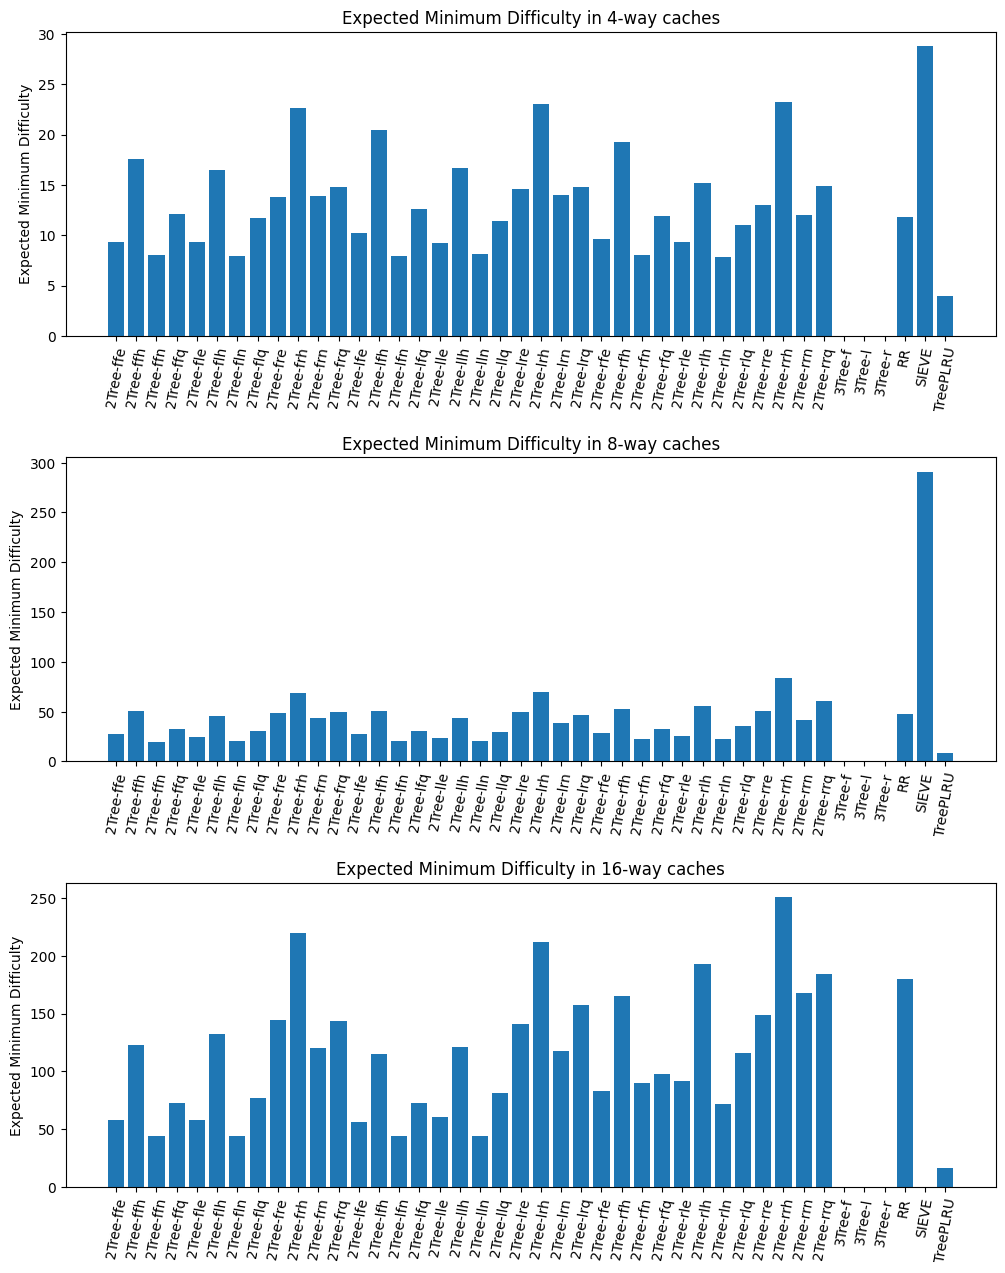

In [46]:
minfig, ( minax4, minax8, minax16 ) = plt.subplots(3, 1, figsize=(12, 15))
minax4.tick_params(axis='x', labelrotation=80)
minax8.tick_params(axis='x', labelrotation=80)
minax16.tick_params(axis='x', labelrotation=80)
minax4.set_ylabel('Expected Minimum Difficulty')
minax8.set_ylabel('Expected Minimum Difficulty')
minax16.set_ylabel('Expected Minimum Difficulty')
minax4.set_title('Expected Minimum Difficulty in 4-way caches')
minax8.set_title('Expected Minimum Difficulty in 8-way caches')
minax16.set_title('Expected Minimum Difficulty in 16-way caches')
minax4.bar(assoc_repls, assoc_mins[0])
minax8.bar(assoc_repls, assoc_mins[1])
minax16.bar(assoc_repls, assoc_mins[2])
plt.subplots_adjust(hspace=0.4)
plt.show()

# minfigwidth = 1
# minfig, minax = plt.subplots()
# minax.bar(np.arange(len(assoc_repls)) - minfigwidth, assoc_mins[0], minfigwidth / 2)
# minax.bar(np.arange(len(assoc_repls)), assoc_mins[1], minfigwidth / 2)
# minax.bar(np.arange(len(assoc_repls)) + minfigwidth, assoc_mins[2], minfigwidth / 2)
# minax.tick_params(axis='x', labelrotation=80)
# plt.xticks(np.arange(len(assoc_repls)), assoc_repls)
# plt.show()